# Get metrics and Plot

In [3]:
import matplotlib.pyplot as plt
from lib.eval import *
from sklearn.metrics import r2_score

In [8]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

event_file = "/home/mkim/Nserver/climate_processes/src/SF_Attn/logs/sfattn_train_seed0_lr0.000139_bs_1_Tue Feb 28 13:35:52 2023/runs/valid/events.out.tfevents.1677620154.kserver-2.1255506.1"
event_acc = EventAccumulator(event_file)
event_acc.Reload() 
event_acc.Tags()

values = [ s.value for s in event_acc.Scalars("non_mae")]
plt.plot(values)


{'images': [],
 'audio': [],
 'histograms': [],
 'scalars': ['mse', 'mae', 'non_mae', 'norm_rmse'],
 'distributions': [],
 'tensors': [],
 'graph': False,
 'meta_graph': False,
 'run_metadata': []}

In [4]:
SFNP_path = "logs/SFNP_train_seed0_lr0.000168_bs_1_Tue Feb 28 01:09:51 2023"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [500]:
evaluator = Evaluator("logs/SFNP_train_seed0_lr0.000168_bs_1_Tue Feb 28 01:09:51 2023")
non_mae, nmae, r = evaluator.get_metrics(evaluator.testloader)

100%|██████████| 362/362 [04:15<00:00,  1.42it/s]


In [463]:
# non_mae, nmae, r = evaluator.get_metrics(evaluator.testloader)
non_mae = np.load("../../notebooks/metrics/sfnp_test_non_mae.npy")
nmae = np.load("../../notebooks/metrics/sfnp_test_nmae.npy")
r = np.load("../../notebooks/metrics/sfnp_test_r.npy")

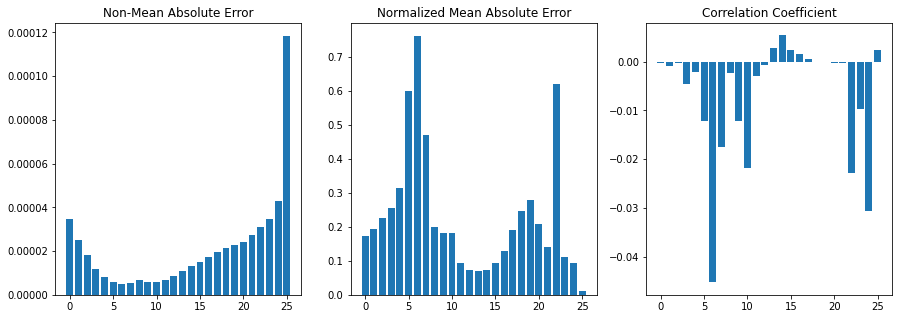

In [464]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].bar(np.arange(26), non_mae)
axs[0].set_title("Non-Mean Absolute Error")
axs[1].bar(np.arange(26), nmae)
axs[1].set_title("Normalized Mean Absolute Error")
axs[2].bar(np.arange(26), r)
axs[2].set_title("Correlation Coefficient")
plt.savefig("../../notebooks/plots/sfnp_test_metrics.jpg")
plt.show()

In [468]:
non_y, non_y_context, non_y_pred, context_idxs, target_idxs = evaluator.plot_scenario(0, split="train")

In [5]:
non_mae = mae_metric(non_y_pred, non_y[target_idxs], mean=True)
R_scores = []
vars = np.arange(26)
for i in vars:
    R_scores.append(r2_score(non_y[target_idxs][:, i], non_y_pred[:, i]))
norm_mae = non_mae / non_y[target_idxs].mean(0)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].bar(vars, R_scores)
axs[0].set_title("R Scores")
axs[1].bar(vars, non_mae)
axs[1].set_title("MAE Scores")
axs[2].bar(vars, norm_mae)
axs[2].set_title("Norm-MAE Scores")
plt.suptitle("For each  26 variables")
plt.savefig("../../notebooks/plots/sfnp_test_metrics_single.jpg")
plt.show()



fig, axs= plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(non_y[target_idxs])
axs[0].set_title("Ground Truth")
axs[1].plot(non_y_pred)
axs[1].set_title("Predicted")
plt.suptitle("Histogram of 26 variables")
plt.savefig("../../notebooks/plots/sfnp_test_hist_single.jpg")
plt.show()



contexts = np.zeros_like(non_y)
contexts[context_idxs] = non_y_context

results = np.zeros_like(non_y)
results[target_idxs] = non_y_pred
# results[context_idxs] = non_y_context


fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(contexts.reshape(96, 144, -1)[:, :, 0])
axs[0].set_title("Context Y")
axs[1].imshow(non_y.reshape(96, 144, -1)[:, :, 0])
axs[1].set_title("Truth Y")
axs[2].imshow(results.reshape(96, 144, -1)[:, :, 0])
axs[2].set_title("Predicted Y")
plt.suptitle(f"NORM-MAE: {norm_mae.mean():.4f}")
plt.savefig("../../notebooks/plots/sfnp_test_viz_single.jpg")
plt.show()

NameError: name 'non_y_pred' is not defined